In [1]:
import requests
import time
import matplotlib.pyplot as plt


In [2]:
url = "http://api.open-notify.org/iss-now.json"

# Initializing lists to store longitude and latitude data
longitudes = []
latitudes = []

for _ in range(720):
    try:
        response = requests.get(url, timeout=5)  # Timeout of 5 seconds
        data = response.json()

        # Extract longitude and latitude
        longitude = float(data['iss_position']['longitude'])
        latitude = float(data['iss_position']['latitude'])

        # Append to lists
        longitudes.append(longitude)
        latitudes.append(latitude)

        # Printing the fetched data
        print(f"Longitude: {longitude}, Latitude: {latitude}")

        # Waiting for 5 seconds before the next fetch
        time.sleep(5)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")


Longitude: 60.4183, Latitude: 44.5444
Longitude: 60.8704, Latitude: 44.7346
Error fetching data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7dd7c95e12a0>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
Error fetching data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7dd7c95e0430>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
Error fetching data: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7dd7c95e38e0>, 'Connection to api.open-notify.org timed out. (connect timeout=5)'))
Longitude: 62.4777, Latitude: 45.3845
Longitude: 62.8661, Latitude: 4

In [3]:
import pandas as pd

# After the loop, saving the data to a CSV file
data = pd.DataFrame({'longitude': longitudes, 'latitude': latitudes})
data.to_csv("satellite_tracking_data.csv", index=False)


In [6]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


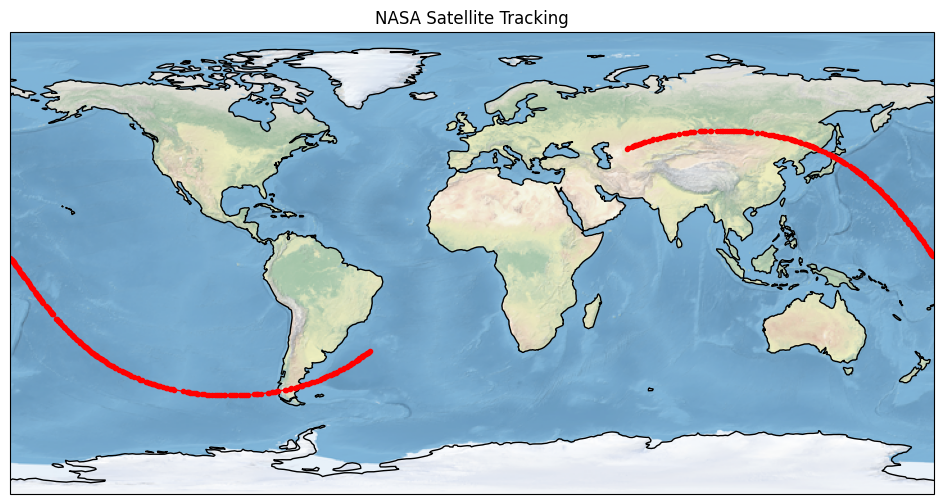

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Plotting the world map and satellite path
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()  # Adds a basic world map background
ax.coastlines()

# Plotting the satellite path
ax.plot(longitudes, latitudes, marker='o', color='r', markersize=3, linewidth=1, transform=ccrs.Geodetic())

plt.title("NASA Satellite Tracking")
plt.show()
